Joukowski Transformation

In [11]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

1. Complex numbers in Python

Exercises 1

In [12]:
a = 2.75
b=3.69
c=8.55
d=6.13

In [13]:
e=(a+b*1j)*(c-d*1j)
print(e)
print(type(e))

(46.1322+14.692000000000004j)
<class 'complex'>


Exercises 2

In [15]:
f=1j*5.32
g=1.4*numpy.exp(f)
print(g)

(0.799270785858-1.1494199454j)


Exercises 3

In [16]:
h=(7.51-9.15*1j)/(4.43+9.64*1j)
print(h)

(-0.4880897698448308-1.0033441577191493j)


2  Shapes created by the Joukowski transformation

Question 1

In [88]:
N = 50                                # number of points in each direction
x_start, x_end = -5.0, 5.0            # boundaries in the x-direction
y_start, y_end = -5.0, 5.0           # boundaries in the y-direction
x = numpy.linspace(x_start, x_end, N)    # creates a 1D-array with the x-coordinates
y = numpy.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates

X, Y = numpy.meshgrid(x, y)  

In [156]:
r=1.5
c1=1
a1,b1=0,0

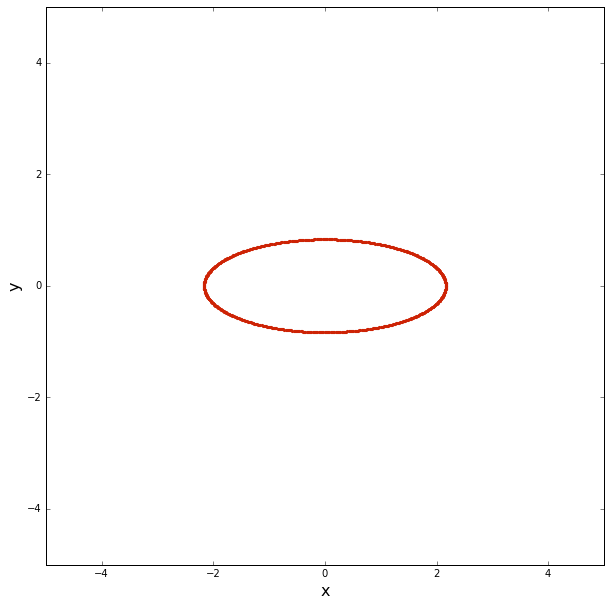

In [246]:
theta = numpy.arange(0, 2*numpy.pi, 0.01)
x1 = a1+r * numpy.cos(theta)
y1 = b1+r * numpy.sin(theta)

z=x1+y1*1j
ep=z+c1**2/z
   

size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(ep.real,ep.imag, s=10, color='#CD2305', marker='o', linewidth=0)


Question 2

In [91]:
r1=1.2
c1=1
a2,b2=c1-r1,0

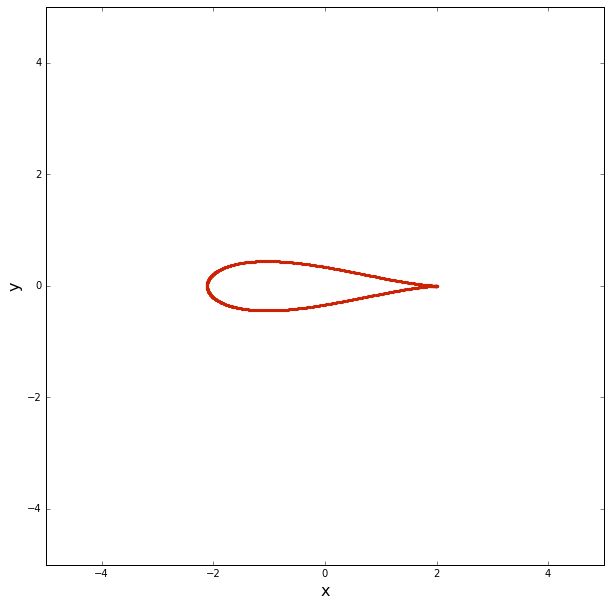

In [247]:
theta = numpy.arange(0, 2*numpy.pi, 0.01)
x2 = a2+r1 * numpy.cos(theta)
y2 = b2+r1 * numpy.sin(theta)

z1=x2+y2*1j
ep1=z1+c1**2/z1
   

size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(ep1.real,ep1.imag, s=10, color='#CD2305', marker='o', linewidth=0)


Question 3

In [93]:
c1=1
a3,b3=-0.1,0.1
r2=math.sqrt((c1-0.1)**2+0.1**2)

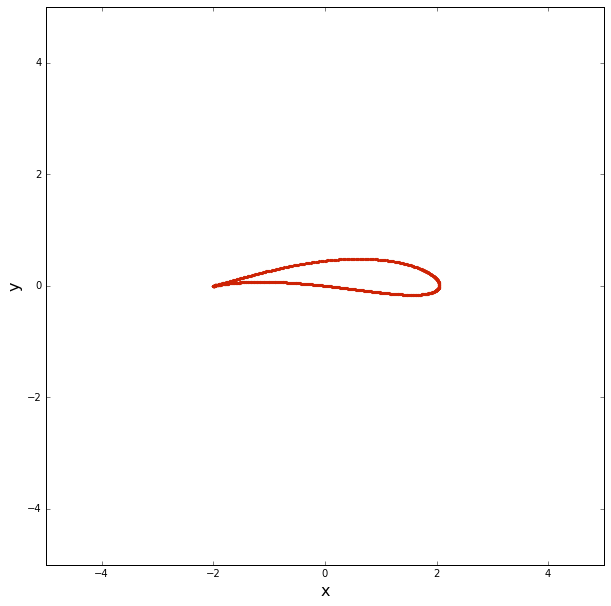

In [248]:
theta = numpy.arange(0, 2*numpy.pi, 0.01)
x3 = a3+r2 * numpy.cos(theta)
y3 = b3+r2 * numpy.sin(theta)

z2=x3+y3*1j
ep2=z2+c1**2/z2
   
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(ep2.real,ep2.imag, s=10, color='#CD2305', marker='o', linewidth=0)


Question 4

In [95]:
#r3=1.2
#c1=1
#a4,b4=c1-r3,0

In [98]:
#theta = numpy.arange(0, 2*numpy.pi, 0.01)
#x2 = a2+r1 * numpy.cos(theta)
#y2 = b2+r1 * numpy.sin(theta)

#z1=x2+y2*1j
#ep1=z1+c1**2/z1
   

#size = 10
#pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
#pyplot.xlabel('x', fontsize=16)
#pyplot.ylabel('y', fontsize=16)
#pyplot.xlim(x_start, x_end)
#pyplot.ylim(y_start, y_end)
#pyplot.scatter(ep1,y2, s=10, color='#CD2305', marker='o', linewidth=0)


3 Grid points on the zz-plane using polar coordinates

Exercises:

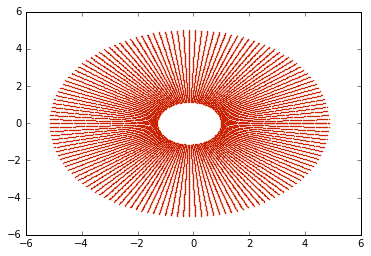

In [466]:
C=1.0
R = 1.15
A,B=-0.15,0
r5 = numpy.linspace(R,5,100)
theta5 = numpy.linspace(0,2*numpy.pi,145)
radius_matrix,theta_matrix = numpy.meshgrid(r5,theta5)
X1 = A+radius_matrix * numpy.cos(theta_matrix)
Y1 = B+radius_matrix * numpy.sin(theta_matrix)


pyplot.scatter(X1,Y1,s=2, color='#CD2305', marker='o', linewidth=0)

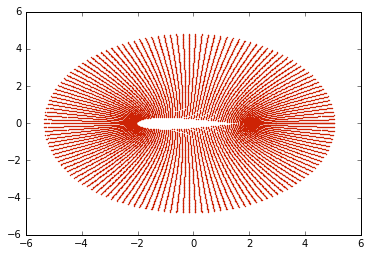

In [467]:
zz=X1+Y1*1j
ebx=zz+C/zz

pyplot.scatter(ebx.real,ebx.imag,s=2, color='#CD2305', marker='o', linewidth=0)

4 Flow over a symmetric Joukowski airfoil with zero angle of attack

In [468]:
def get_stream_function_doublet(strength, xd, yd, X, Y):
   
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

In [469]:
kappa =8.30  #R= math.sqrt(kappa/(2*math.pi*u_inf)) so, kappa=8.30

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, A, B, X1, Y1)

In [470]:
u_inf = 1.0        # freestream speed

# compute the stream-function
psi_freestream = u_inf * Y1

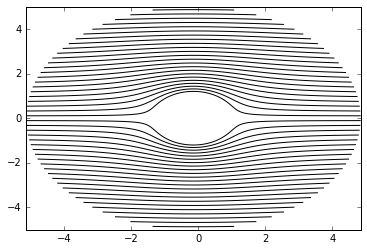

In [471]:
psi = psi_freestream + psi_doublet

#pyplot.streamplot(X1, Y1, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

pyplot.contour(X1, Y1, psi,levels = numpy.linspace(-5,5,50), colors='black',linestyles='solid')

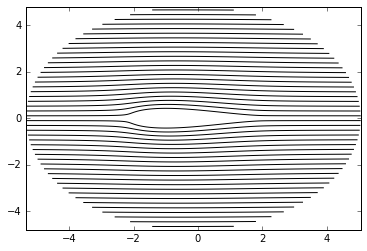

In [472]:
pyplot.contour(ebx.real, ebx.imag, psi,levels = numpy.linspace(-5,5,50), colors='black', linestyles='solid')

In [473]:
def get_velocity_doublet(strength, xd, yd, X, Y):
   
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

In [474]:
u_doublet, v_doublet = get_velocity_doublet(kappa, A, B, X1, Y1)
u_freestream = u_inf * numpy.ones((145, 100), dtype=float)
v_freestream = numpy.zeros((145, 100), dtype=float)

u = u_freestream + u_doublet
v = v_freestream + v_doublet

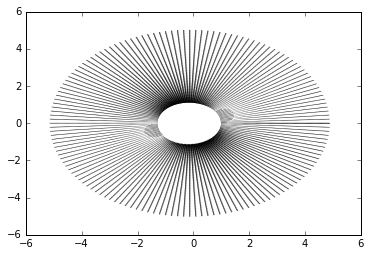

In [545]:
pyplot.quiver(X1,Y1,u,v)

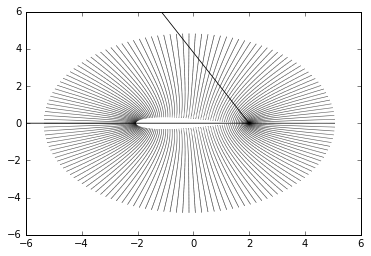

In [476]:
W=(u-v*1j)/(1-(C/zz)**2)
pyplot.quiver(ebx.real,ebx.imag,W.real,W.imag)

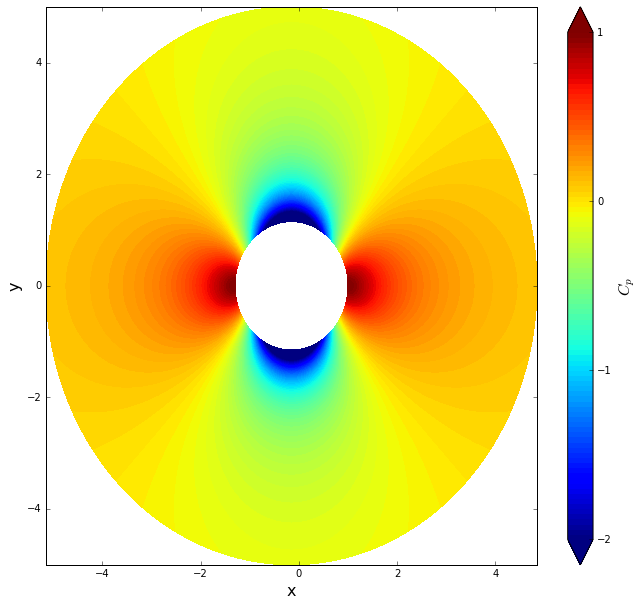

In [477]:
cp = 1.0 - (u**2+v**2/u_inf**2)

pyplot.figure(figsize=(1.1*size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
contf = pyplot.contourf(X1, Y1, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

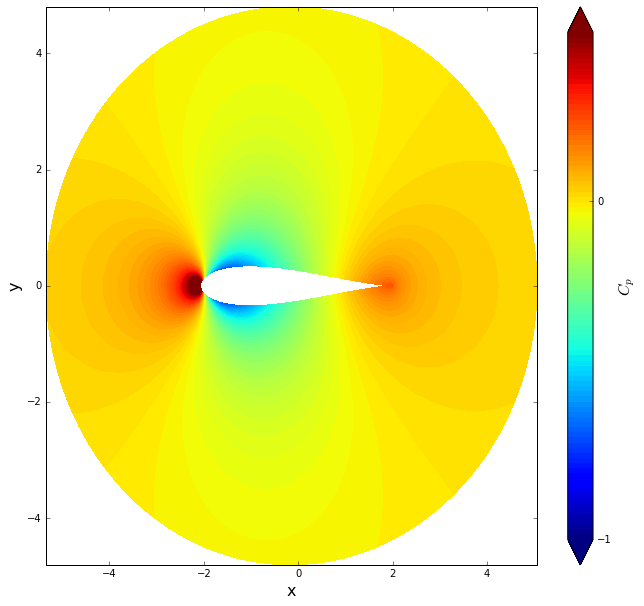

In [478]:
cp_ebx=1.0-((W.real**2+W.imag**2)/u_inf**2)

pyplot.figure(figsize=(1.1*size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
contf = pyplot.contourf(ebx.real, ebx.imag, cp_ebx, levels=numpy.linspace(-1.0, 0.5, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

In [479]:
(u[61][0]-1j*v[61][0])/(1-(C/zz[61][0])**2)

(1.1062809707323582-0.52211715049495633j)

In [480]:
kappa

8.3

5 Flow over a symmetric Joukowski airfoil with non-zero angle of attack, without circulation

In [536]:
radius = 1
r = numpy.linspace(radius, 5,100)
theta = numpy.linspace(0, 2*numpy.pi,145)
R, Theta = numpy.meshgrid(r,theta)

c = radius
A = 0.15
B = 0.0

e = -1*A + 1j*B
r_eps = math.sqrt(A**2+B**2)

aoa=20/180*numpy.pi
angle = numpy.exp(-1j*aoa)

zz = R*numpy.exp(Theta*1j)
z11 = zz * angle 
zz = zz + e
zz = zz + r_eps*numpy.exp(Theta*1j)
z11 = z11 + e
z11 = z11 + r_eps*numpy.exp(Theta*1j)

ebx = zz+c**2/zz

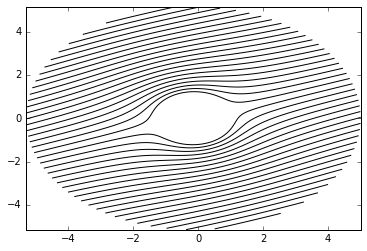

In [537]:
psi_doublet1 = get_stream_function_doublet(kappa, -A, B, z11.real, z11.imag)
u_inf = 1.0        # freestream speed

# compute the stream-function
psi_freestream = u_inf * z11.imag
psi = psi_freestream + psi_doublet1

#pyplot.streamplot(X1, Y1, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

pyplot.contour(zz.real, zz.imag, psi,levels = numpy.linspace(-6,6,50), colors='black',linestyles='solid')

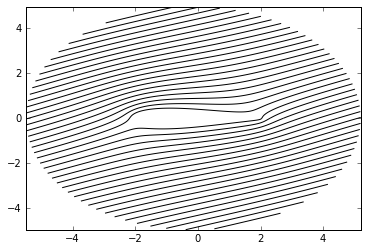

In [538]:
pyplot.contour(ebx.real, ebx.imag, psi,levels = numpy.linspace(-6,6,50), colors='black',linestyles='solid')

In [539]:
u_doublet, v_doublet = get_velocity_doublet(kappa, -A, B, z11.real, z11.imag)

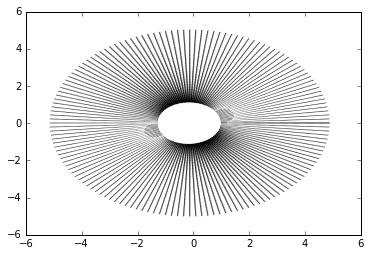

In [572]:
u = u_freestream + u_doublet
v = v_freestream + v_doublet

U = (u-1j*v)*angle
pyplot.quiver(X1, Y1, U.real, -U.imag)

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


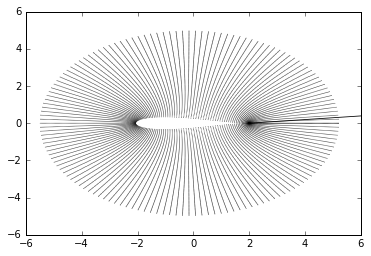

In [573]:
W1 = (U.real+1j*U.imag)/(1-(C/zz)**2)
pyplot.quiver(ebx.real,ebx.imag,W1.real,-W1.imag)

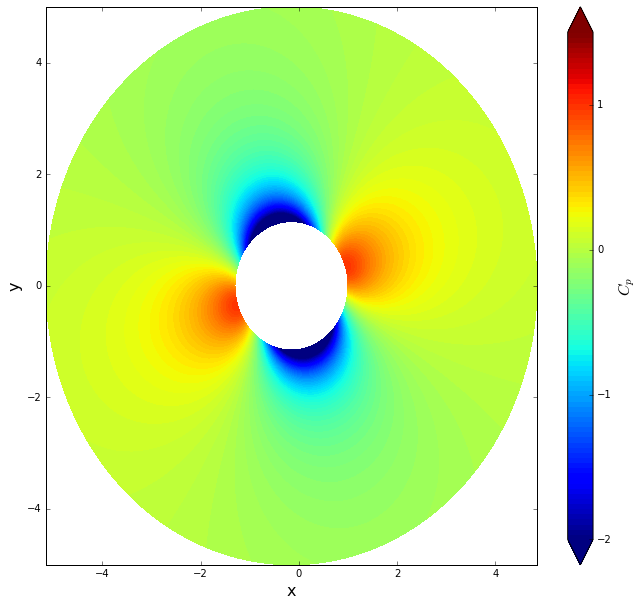

In [542]:
cp = 1.0 - (U.real**2+U.imag**2)/u_inf**2

pyplot.figure(figsize=(1.1*size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
contf = pyplot.contourf(X1, Y1, cp, levels=numpy.linspace(-2.0, 1.5, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

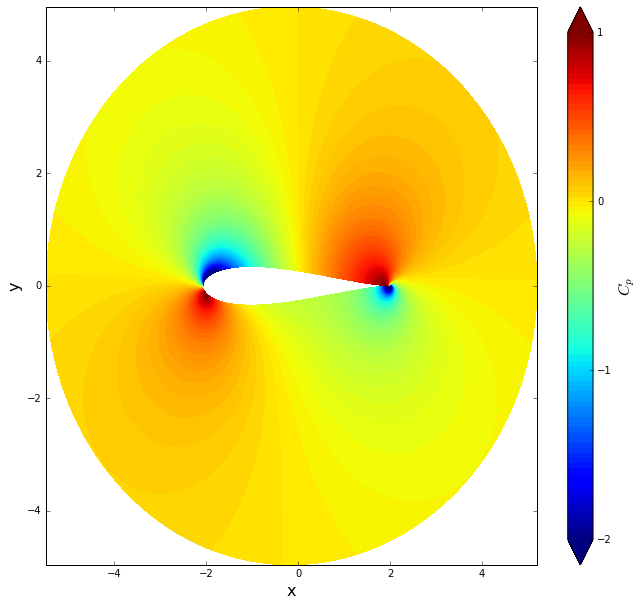

In [543]:
cp_ebx=1.0-((W1.real**2+W1.imag**2)/u_inf**2)

pyplot.figure(figsize=(1.1*size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
contf = pyplot.contourf(ebx.real, ebx.imag, cp_ebx, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

In [580]:
W1.real[49][0]

1.4702453549903414

In [581]:
W1.imag[49][0]

-0.16035965728483711

In [583]:
cp_ebx[74][0]

-5.9721224523301952

In [593]:
numpy.where(cp_ebx==numpy.max(cp_ebx))

(array([87]), array([0]))

6 Flow over a symmetric Joukowski airfoil with non-zero angle of attack, with circulation

In [549]:
def get_velocity_vortex(strength, xv, yv, X, Y):

    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):

    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [550]:
gamma = 4.94     #R= gamma/(4*numpy.pi*u_inf*sin(theta))

In [551]:
# compute the velocity field on the mesh grid
u_vortex, v_vortex = get_velocity_vortex(gamma, -A, B, z11.real, z11.imag)

# compute the stream-function on the mesh grid
psi_vortex = get_stream_function_vortex(gamma, -A, -B, z11.real, z11.imag)

In [552]:
u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet1 + psi_vortex

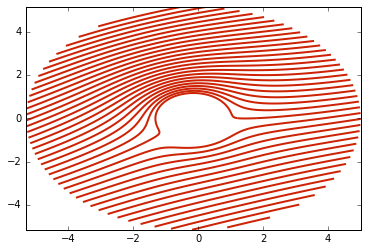

In [554]:
pyplot.contour(zz.real, zz.imag, psi, levels = numpy.linspace(-6,6,50), colors='#CD2305', linewidths=2, linestyles='solid')

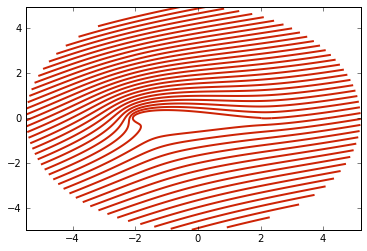

In [555]:
pyplot.contour(ebx.real, ebx.imag, psi, levels = numpy.linspace(-6,6,50), colors='#CD2305', linewidths=2, linestyles='solid')

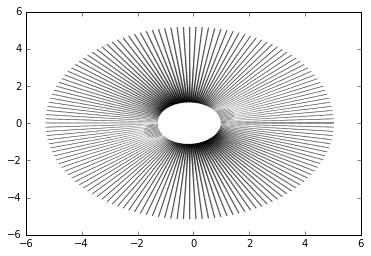

In [574]:
U1 = (u-1j*v)*angle

pyplot.quiver(zz.real, zz.imag, U1.real, -U1.imag)

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


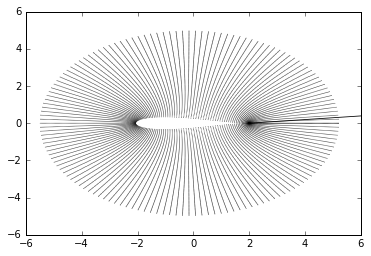

In [575]:
w = (U1.real+1j*U1.imag)/(1-(c/zz)**2)
pyplot.quiver(ebx.real, ebx.imag, w.real, -w.imag)

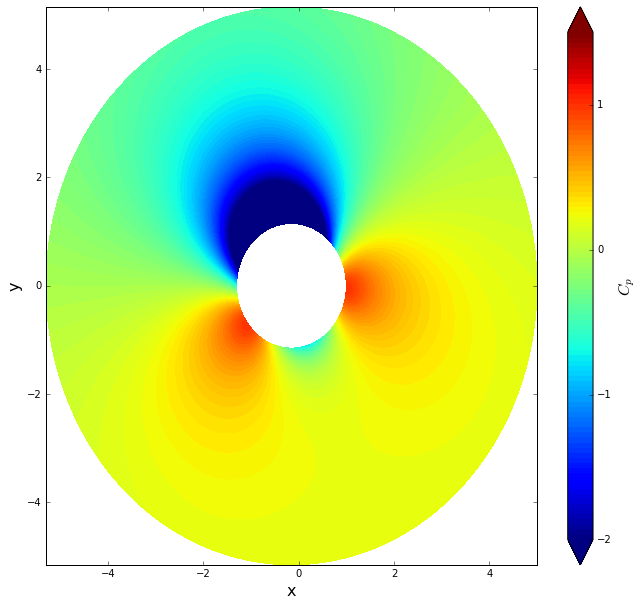

In [563]:
cp = 1.0 - (U1.real**2+U1.imag**2)/u_inf**2

pyplot.figure(figsize=(1.1*size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
contf = pyplot.contourf(zz.real, zz.imag, cp, levels=numpy.linspace(-2.0, 1.5, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

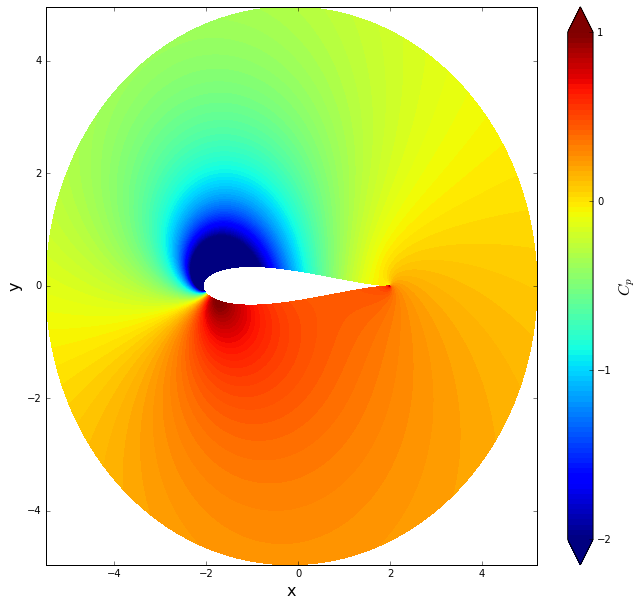

In [564]:
cp_ebx=1.0-((w.real**2+w.imag**2)/u_inf**2)

pyplot.figure(figsize=(1.1*size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
contf = pyplot.contourf(ebx.real, ebx.imag, cp_ebx, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

In [597]:
w[91][0]

(0.88228527821708769+0.10478866067527488j)

In [595]:
cp_ebx[110][0]

0.47273312147440549